# Modelling

## Imports

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle

# Load Data

In [103]:
X = pd.read_parquet('../../data/preprocessed/full_data.pq')
y = pd.read_parquet('../../data/preprocessed/full_data_y.pq')

X1_train = pd.read_parquet('../../data/preprocessed/holdout_1.pq')
X1_test = pd.read_parquet('../../data/preprocessed/thursdays.pq')
y1_train = pd.read_parquet('../../data/preprocessed/holdout_1_y.pq')
y1_test = pd.read_parquet('../../data/preprocessed/thursdays_y.pq')

X2_train = pd.read_parquet('../../data/preprocessed/holdout_2.pq')
X2_test = pd.read_parquet('../../data/preprocessed/tuesdays.pq')
y2_train = pd.read_parquet('../../data/preprocessed/holdout_2_y.pq')
y2_test = pd.read_parquet('../../data/preprocessed/tuesdays_y.pq')

X3_train = pd.read_parquet('../../data/preprocessed/holdout_3.pq')
X3_test = pd.read_parquet('../../data/preprocessed/wednesdays.pq')
y3_train = pd.read_parquet('../../data/preprocessed/holdout_3_y.pq')
y3_test = pd.read_parquet('../../data/preprocessed/wednesdays_y.pq')

print(f"X1 Train Shapes [{X1_train.shape} / {y1_train.shape}]")
print(f"X1 Test Shapes [{X1_test.shape} / {y1_test.shape}]")
print(f"X2 Train Shapes [{X2_train.shape} / {y2_train.shape}]")
print(f"X2 Test Shapes [{X2_test.shape} / {y2_test.shape}]")
print(X1_train.columns)
X1_test.head()

X1 Train Shapes [(478807, 18) / (478807, 1)]
X1 Test Shapes [(273604, 18) / (273604, 1)]
X2 Train Shapes [(478807, 18) / (478807, 1)]
X2 Test Shapes [(273604, 18) / (273604, 1)]
Index(['ProzessData_ActData_AB1_Analogs_DX1_MassPressure',
       'ProzessData_ActData_AB1_Analogs_GY1_MassLevelTank',
       'ProzessData_ActData_AB1_Current_DV1_Scraper',
       'ProzessData_ActData_AB1_Current_DW1_RiserPumpFwd',
       'ProzessData_ActData_AB1_Speed_DV1_Scraper',
       'ProzessData_ActData_AB1_Speed_DW1_RiserPumpFwd',
       'ProzessData_ActData_AB1_Temperature_DP1_MassHeatingStage',
       'ProzessData_ActData_AB1_Temperature_DP1_WaterHeatingStage',
       'ProzessData_ActData_AB1_Temperature_DQ1_MassCoolingStage',
       'ProzessData_ActData_AB1_Temperature_DQ1_WaterCoolingStage',
       'ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage',
       'ProzessData_ActData_AB1_Temperature_DS1_WaterPipe',
       'ProzessData_ActData_AB1_Temperature_DU1_WaterTank',
       'ProzessData_ActD

,ProzessData_ActData_AB1_Analogs_DX1_MassPressure,ProzessData_ActData_AB1_Analogs_GY1_MassLevelTank,ProzessData_ActData_AB1_Current_DV1_Scraper,ProzessData_ActData_AB1_Current_DW1_RiserPumpFwd,ProzessData_ActData_AB1_Speed_DV1_Scraper,ProzessData_ActData_AB1_Speed_DW1_RiserPumpFwd,ProzessData_ActData_AB1_Temperature_DP1_MassHeatingStage,ProzessData_ActData_AB1_Temperature_DP1_WaterHeatingStage,ProzessData_ActData_AB1_Temperature_DQ1_MassCoolingStage,ProzessData_ActData_AB1_Temperature_DQ1_WaterCoolingStage,ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage,ProzessData_ActData_AB1_Temperature_DS1_WaterPipe,ProzessData_ActData_AB1_Temperature_DU1_WaterTank,ProzessData_ActData_AB1_Temperature_DX1_MassInfeed,hour,minute,day_time,night_time
2023-03-16 01:00:00+00:00,0.74,64.07,0.0,0.0,0.0,0.0,41.299999,42.000000,41.599998,42.0,42.0,41.849998,42.000000,41.900002,1,0,0,1
2023-03-16 01:00:01+00:00,0.75,64.07,0.0,0.0,0.0,0.0,41.299999,42.099998,41.599998,42.0,42.0,41.849998,41.900002,41.900002,1,0,0,1
2023-03-16 01:00:02+00:00,0.74,64.07,0.0,0.0,0.0,0.0,41.299999,42.099998,41.599998,42.0,42.0,41.849998,41.900002,41.900002,1,0,0,1
2023-03-16 01:00:03+00:00,0.75,64.07,0.0,0.0,0.0,0.0,41.299999,42.099998,41.599998,42.0,42.0,41.849998,41.900002,41.900002,1,0,0,1
2023-03-16 01:00:04+00:00,0.75,64.07,0.0,0.0,0.0,0.0,41.299999,42.099998,41.599998,42.0,42.0,41.849998,41.900002,41.900002,1,0,0,1


### Preprocess 2

In [104]:
# Data for Day Model
X1_train_day = X1_train[X1_train['day_time'] == 1]
y1_train_day = y1_train[X1_train['day_time'] == 1]
X1_test_day = X1_test[X1_test['day_time'] == 1]
y1_test_day = y1_test[X1_test['day_time'] == 1]

# Data for Night Model
X1_train_night = X1_train[X1_train['day_time'] == 0]
y1_train_night = y1_train[X1_train['day_time'] == 0]
X1_test_night = X1_train[X1_train['day_time'] == 0]
y1_test_night = y1_train[X1_train['day_time'] == 0]

In [105]:
X1_train_day = X1_train_day.drop(columns=['day_time', 'night_time'])
X1_test_day = X1_test_day.drop(columns=['day_time', 'night_time'])
X1_train_night = X1_train_night.drop(columns=['day_time', 'night_time'])
X1_test_night = X1_test_night.drop(columns=['day_time', 'night_time'])

### Utility Functions

In [58]:
def evaluation(X_test, y_test, y_pred, pca=False, examples=True, detailedEval=False):
    # Calculate the MAE, MSE and RMSE
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE: {mae}")
    if detailedEval:
        mse = mean_squared_error(y_test, y_pred, squared=True)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        print(f"MSE: {mse}")
        print(f"RMSE: {rmse}")

    if not pca and examples:
        # Print some example predictions
        example_indices = [0, 1, 2, 3, 4]
        for i in example_indices:
            print(f"{X_test.index[i]}: | Actual y: {y_test.iloc[i, 0]} | Predicted y: {y_pred[i]}")

## Baseline

### Linear Regression

In [106]:
# split with day/night
from sklearn.linear_model import LinearRegression

# Train a linear regression model
model = LinearRegression()
model.fit(X1_train_day, y1_train_day)

# Make predictions on the testing data
y_pred = model.predict(X1_test_day)

evaluation(X1_test_day, y1_test_day, y_pred, examples=False)

MAE: 0.07448447862126577


In [107]:
# split with day/night
from sklearn.linear_model import LinearRegression

# Train a linear regression model
model = LinearRegression()
model.fit(X1_train_night, y1_train_night)

# Make predictions on the testing data
y_pred = model.predict(X1_test_night)

evaluation(X1_test_night, y1_test_night, y_pred, examples=False)

MAE: 0.016825388088421715


## Normal Model

In [60]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model
model = LinearRegression()
model.fit(X1_train_day, y1_train_day)

# Make predictions on the testing data
y_pred = model.predict(X1_test_day)

evaluation(X1_test_day, y1_test_day, y_pred, examples=False)

model = LinearRegression()
model.fit(X2_train, y2_train)
y2_pred = model.predict(X2_test)
evaluation(X2_test, y2_test, y2_pred, examples=False)

model = LinearRegression()
model.fit(X3_train, y3_train)
y3_pred = model.predict(X3_test)
evaluation(X3_test, y3_test, y3_pred, examples=False)

# Save Model
with open('../../models/linreg.pkl', 'wb') as file:
    pickle.dump(model, file)

MAE: 0.1156329028301002
MAE: 0.0834787067955579
MAE: 0.0581338788267188


### Ridge Linear Regression

In [109]:
from sklearn.linear_model import Ridge

# Train the model
model = Ridge(alpha=1.0)
model.fit(X1_train_night, y1_train_night)

# Make predictions
y_pred = model.predict(X1_test_night)

evaluation(X1_test_night, y1_test_night, y_pred)

MAE: 0.016357997171470497
2023-03-14 01:00:00+00:00: | Actual y: 41.5 | Predicted y: [41.49555901]
2023-03-14 01:00:01+00:00: | Actual y: 41.5 | Predicted y: [41.49546471]
2023-03-14 01:00:02+00:00: | Actual y: 41.5 | Predicted y: [41.49553625]
2023-03-14 01:00:03+00:00: | Actual y: 41.5 | Predicted y: [41.49550707]
2023-03-14 01:00:04+00:00: | Actual y: 41.5 | Predicted y: [41.49584151]


### Lasso Linear Regression

In [111]:
from sklearn.linear_model import Lasso

# Train the model
model = Lasso(alpha=0.1)
model.fit(X1_train_night, y1_train_night)

# Make predictions
y_pred = model.predict(X1_test_night)

evaluation(X1_test_night, y1_test_night, y_pred)

MAE: 0.022400123684820236
2023-03-14 01:00:00+00:00: | Actual y: 41.5 | Predicted y: 41.48714823408264
2023-03-14 01:00:01+00:00: | Actual y: 41.5 | Predicted y: 41.48714823408264
2023-03-14 01:00:02+00:00: | Actual y: 41.5 | Predicted y: 41.48714823408264
2023-03-14 01:00:03+00:00: | Actual y: 41.5 | Predicted y: 41.48714823408264
2023-03-14 01:00:04+00:00: | Actual y: 41.5 | Predicted y: 41.48714823408264


## XGBoost

In [37]:
import xgboost as xgb

# Convert the data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the testing data
y_pred = model.predict(dtest)

evaluation(X_test, y_test, y_pred)

MAE: 0.1766035124962132
MSE: 0.03828374557616717
RMSE: 0.19566232538781494
2023-03-16 01:00:00+00:00: | Actual y: 41.5 | Predicted y: 41.30536651611328
2023-03-16 01:00:01+00:00: | Actual y: 41.5 | Predicted y: 41.30536651611328
2023-03-16 01:00:02+00:00: | Actual y: 41.5 | Predicted y: 41.30536651611328
2023-03-16 01:00:03+00:00: | Actual y: 41.5 | Predicted y: 41.30536651611328
2023-03-16 01:00:04+00:00: | Actual y: 41.5 | Predicted y: 41.30536651611328


In [ ]:
from sklearn.decomposition import PCA
import xgboost as xgb



# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1)

# # Custom Split
# X_train = X_pca
# y_train = y1
# X_test = eval_3_x
# y_test = eval_3_y

# Split the data into training and testing sets
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(X_pca, y1, test_size=0.2, random_state=42)

# Convert the data into DMatrix format
dtrain = xgb.DMatrix(pca_X_train, label=pca_y_train)
dtest = xgb.DMatrix(pca_X_test, label=pca_y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the testing data
y_pred = model.predict(dtest)

evaluation(pca_X_test, pca_y_test, y_pred, pca=True)

MAE: 0.21534708539246938
MSE: 0.1916308900449985
RMSE: 0.43775665619725135


In [39]:
# PCA Calculation
# Standardize the features using z-score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Perform PCA
pca = PCA()
pca.fit_transform(X_scaled)

# Calculate non-cumulative PVE
non_cumulative_pve = pca.explained_variance_ratio_

# Calculate cumulative PVE
cumulative_pve = np.cumsum(non_cumulative_pve)

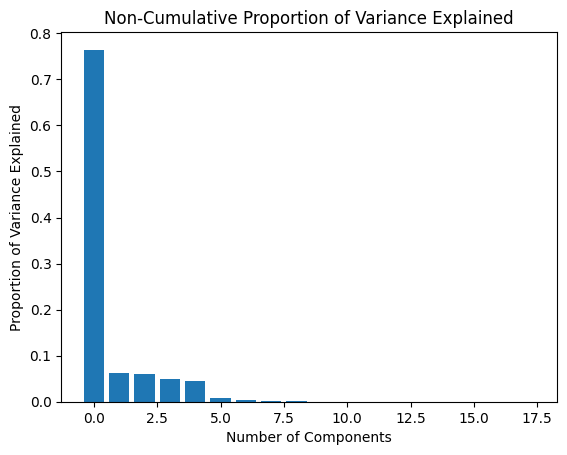

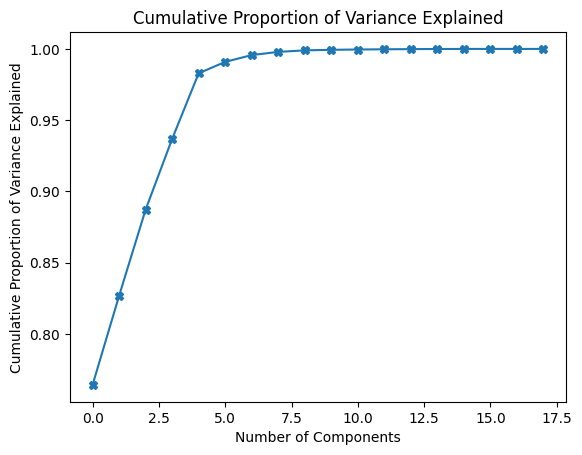

In [40]:
# Plot non-cumulative PVE
plt.bar(range(len(non_cumulative_pve)), non_cumulative_pve)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained')
plt.title('Non-Cumulative Proportion of Variance Explained')
plt.show()

# Plot cumulative PVE
plt.plot(cumulative_pve, marker="X")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Cumulative Proportion of Variance Explained')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features using z-score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(X_scaled, y_train, test_size=0.2, random_state=42)

# Convert the data into DMatrix format
dtrain = xgb.DMatrix(pca_X_train, label=pca_y_train)
dtest = xgb.DMatrix(pca_X_test, label=pca_y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'mse'
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the testing data
y_pred = model.predict(dtest)

evaluation(pca_X_test, pca_y_test, y_pred, pca=True)

XGBoostError: [09:03:58] /workspace/src/metric/metric.cc:49: Unknown metric function mse
Stack trace:
  [bt] (0) /home/codespace/.python/current/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x1ba24e) [0x7fc79473224e]
  [bt] (1) /home/codespace/.python/current/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x4f7e7e) [0x7fc794a6fe7e]
  [bt] (2) /home/codespace/.python/current/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x4ccdd3) [0x7fc794a44dd3]
  [bt] (3) /home/codespace/.python/current/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x4c5268) [0x7fc794a3d268]
  [bt] (4) /home/codespace/.python/current/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7fc7946d9ef0]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.7(+0x6ff5) [0x7fc86ef4fff5]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.7(+0x640a) [0x7fc86ef4f40a]
  [bt] (7) /home/codespace/.python/current/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x12f51) [0x7fc86f1f5f51]
  [bt] (8) /home/codespace/.python/current/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xca11) [0x7fc86f1efa11]

